In [3]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.


In [89]:
# reading in final dataframe
kahuna = pd.read_csv('../data/added_data/kahuna.csv')

In [90]:
df1 = kahuna.copy()

-------------------------

## KMeans Clustering

In [5]:
X = kahuna.drop(columns=['Entity', 'Year'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

KMeans(n_clusters=3, random_state=42)

In [10]:
from scipy.spatial.distance import cdist, pdist

Number of Clusters: 1 	Average Distortion: 3.428016342180774
Number of Clusters: 2 	Average Distortion: 3.1217945014615798
Number of Clusters: 3 	Average Distortion: 2.982380039455774
Number of Clusters: 4 	Average Distortion: 2.565204275047013
Number of Clusters: 5 	Average Distortion: 2.4810774889805005
Number of Clusters: 6 	Average Distortion: 2.342177797220058
Number of Clusters: 7 	Average Distortion: 2.18430902276487
Number of Clusters: 8 	Average Distortion: 2.1053095381894127


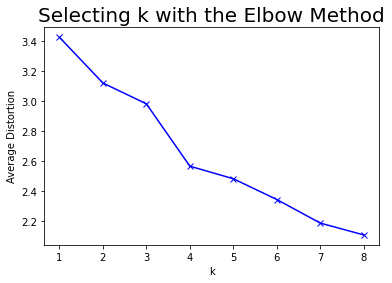

In [11]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X_sc)
    prediction = model.predict(X_sc)
    distortion = (
        sum(np.min(cdist(X_sc, model.cluster_centers_, "euclidean"), axis=1))
        / X_sc.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [17]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

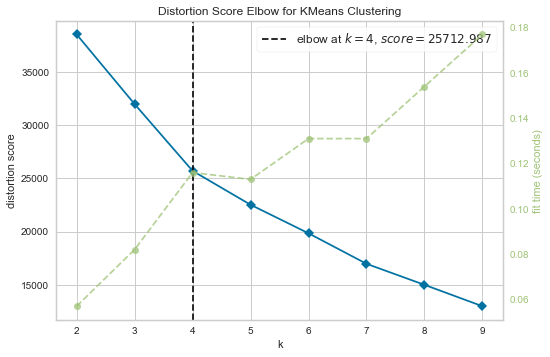

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [102]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=2, random_state=42)

In [103]:
km.cluster_centers_;

In [104]:
kahuna['cluster'] = km.labels_
kahuna.head()

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,cluster
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,500000.0,...,5.975427,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0,0
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,600000.0,...,4.580403,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0,0
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,600000.0,...,4.373679,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0,0
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.2,0.01,500000.0,...,4.414006,269.448518,521.197486,57.988035,40.035,3.13,114.900766,4400.577827,775150.0,0
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.6,0.01,700000.0,...,4.493629,280.472022,547.315668,64.973478,40.601,2.99,114.179927,4819.387534,773200.0,0


In [29]:
# comparision of numerical representations of clusters means
kahuna.groupby('cluster').mean().T

cluster,0,1,2,3
Year,2.002622e+03,2.001500e+03,2.001552e+03,2.001500e+03
Deaths %,8.761786e+00,3.911636e+00,1.417707e+01,1.983135e+01
CO2 Emissions,1.458546e+08,5.664404e+09,2.557077e+07,3.149207e+09
CO2 Emissions Per Cap,7.634302e+00,1.994650e+01,7.357408e-01,2.463833e+00
Food Emissions,9.376033e+07,1.411459e+09,1.196100e+08,1.432680e+09
Total GHG,2.223324e+08,6.159870e+09,1.471003e+08,3.915459e+09
Consumption of Ozone,1.562110e+03,4.746796e+04,5.126729e+02,3.551738e+04
Shared CO2 Emissions,5.247337e-01,2.097917e+01,9.400000e-02,1.093333e+01
Transport,2.809501e+07,1.637742e+09,6.280479e+06,2.191417e+08
Death_rate_ambient_ozone_pol,1.775393e+00,3.014308e+00,3.256993e+00,1.621379e+01


In [30]:
columns = kahuna.columns.drop(['Entity', 'cluster', 'Year'])

In [31]:
km.cluster_centers_;

In [32]:
kahuna.shape

(2409, 27)

In [33]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=columns
)
centroids.T

,0,1,2,3
Deaths %,8.763674e+00,3.911636e+00,1.418016e+01,1.983135e+01
CO2 Emissions,1.457661e+08,5.664404e+09,2.558610e+07,3.149207e+09
CO2 Emissions Per Cap,7.629768e+00,1.994650e+01,7.356402e-01,2.463833e+00
Food Emissions,9.371892e+07,1.411459e+09,1.197156e+08,1.432680e+09
Total GHG,2.222096e+08,6.159870e+09,1.472314e+08,3.915459e+09
Consumption of Ozone,1.561237e+03,4.746796e+04,5.129879e+02,3.551738e+04
Shared CO2 Emissions,5.244112e-01,2.097917e+01,9.406475e-02,1.093333e+01
Transport,2.808024e+07,1.637742e+09,6.280935e+06,2.191417e+08
Death_rate_ambient_ozone_pol,1.774759e+00,3.014308e+00,3.259911e+00,1.621379e+01
Death_rate_household_air_pol,1.514265e+01,7.250909e-02,1.477576e+02,1.321593e+02


In [39]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((X_sc))
    score = silhouette_score(X_sc, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.7981390902486566)
For n_clusters = 3, the silhouette score is 0.7612867245387583)
For n_clusters = 4, the silhouette score is 0.27662500117516176)
For n_clusters = 5, the silhouette score is 0.2791132606911262)
For n_clusters = 6, the silhouette score is 0.31033346072670365)
For n_clusters = 7, the silhouette score is 0.31737497217549016)
For n_clusters = 8, the silhouette score is 0.3242921878784138)
For n_clusters = 9, the silhouette score is 0.31230075866373397)
For n_clusters = 10, the silhouette score is 0.3250320829001155)


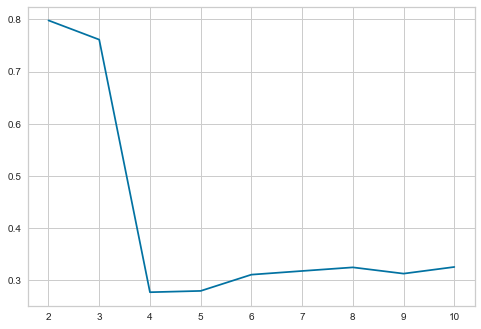

In [41]:
plt.plot(cluster_list, sil_score)
plt.show()

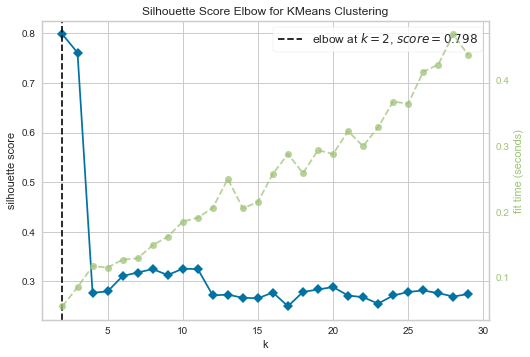

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

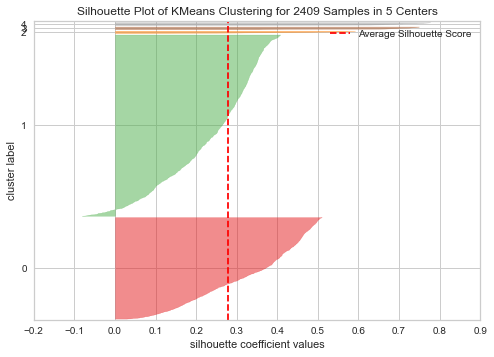

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2409 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(X_sc)
visualizer.show()

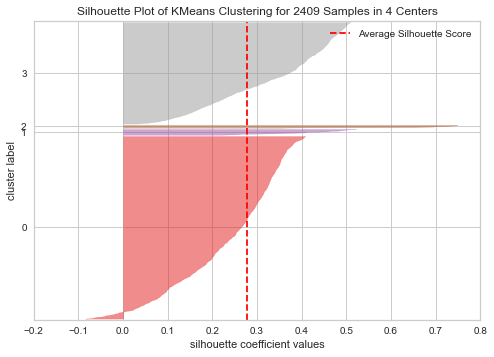

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2409 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(X_sc)
visualizer.show()

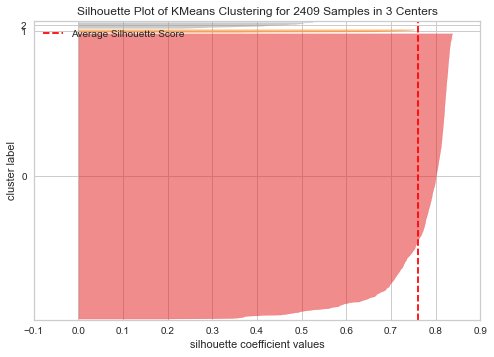

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2409 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(X_sc)
visualizer.show()

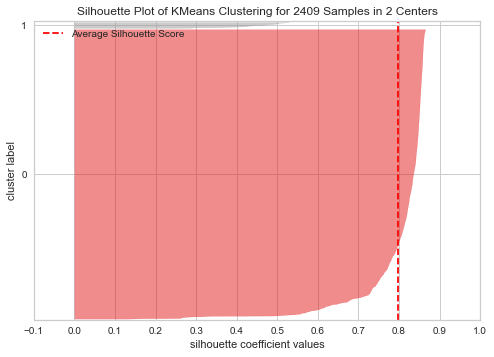

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2409 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(X_sc)
visualizer.show()

In [34]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [35]:
score_df.head(11)

,k,inertia,silhouette
0,2,38563.314328,0.798139
1,3,32001.744490,0.761287
2,4,25712.987016,0.276625
3,5,22522.389041,0.279113
4,6,19631.994177,0.300913
5,7,16958.832329,0.316833
6,8,14979.813332,0.292704
7,9,12962.770742,0.310387
8,10,11933.770565,0.320688
9,11,10811.316125,0.322484


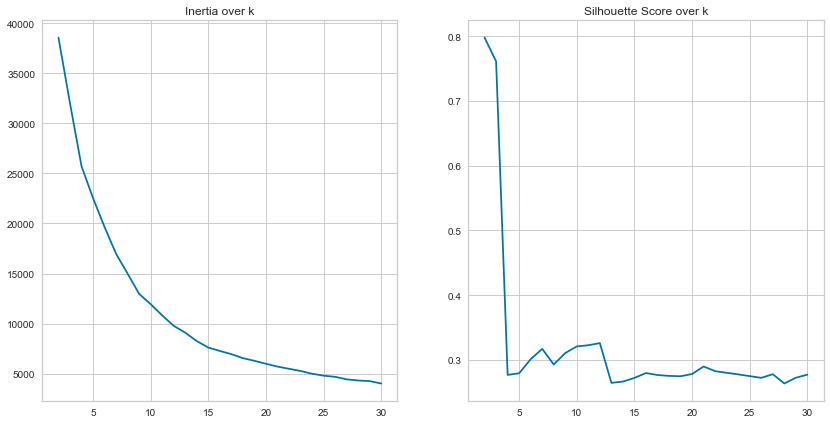

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [21]:
# group is the largest cluster by far
kahuna['cluster'].value_counts()

0    2337
1      48
2      24
Name: cluster, dtype: int64

In [46]:
km_10 = KMeans(n_clusters=10, random_state=42)
km_10.fit(X_sc)

KMeans(n_clusters=10, random_state=42)

In [47]:
kahuna['clusterx10'] = km_10.labels_

In [55]:
kahuna['clusterx10'].value_counts()

0    1176
3     569
2     398
7     121
9      49
5      24
6      24
4      24
8      14
1      10
Name: clusterx10, dtype: int64

<AxesSubplot:>

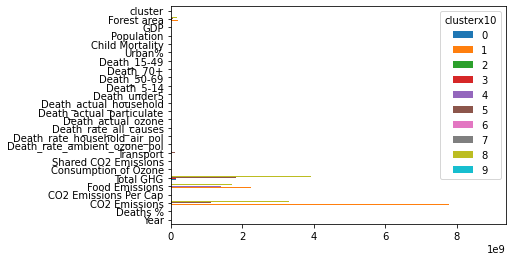

In [51]:
kahuna.groupby(by='clusterx10').mean().T.plot(kind='barh')

In [48]:
kahuna

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,cluster,clusterx10
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.00,0.02,500000.0,...,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0,0,3
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.40,0.01,600000.0,...,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0,0,0
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.20,0.01,600000.0,...,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0,0,0
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.20,0.01,500000.0,...,269.448518,521.197486,57.988035,40.035,3.13,114.900766,4400.577827,775150.0,0,0
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.60,0.01,700000.0,...,280.472022,547.315668,64.973478,40.601,2.99,114.179927,4819.387534,773200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,Zimbabwe,2010,9.450169,7878316,0.6205,55244889.2,66540000.0,29.30,0.02,1300000.0,...,735.443275,684.000846,253.211851,33.196,8.76,32.823389,2458.220626,17905280.0,0,3
2405,Zimbabwe,2011,10.053401,9743983,0.7557,53985614.6,67420000.0,22.22,0.03,2300000.0,...,750.211216,687.415400,252.443341,33.015,8.14,33.331583,2764.338916,17859210.0,0,3
2406,Zimbabwe,2012,10.455091,7882889,0.6011,54211027.7,67630000.0,16.20,0.02,2600000.0,...,783.503715,711.735517,258.678699,32.834,7.38,33.902414,3170.726522,17813140.0,0,3
2407,Zimbabwe,2013,10.691584,11836254,0.8866,54321218.5,67550000.0,15.76,0.03,2900000.0,...,824.426468,740.153224,266.910947,32.654,6.78,34.510477,3176.829330,17767070.0,0,3


In [60]:
kahuna['Entity'].value_counts()

Ecuador      25
Pakistan     25
Togo         25
Egypt        25
Brazil       25
             ..
Lithuania     9
Sweden        5
Finland       5
Austria       5
Sudan         2
Name: Entity, Length: 116, dtype: int64

<Figure size 2880x1440 with 0 Axes>

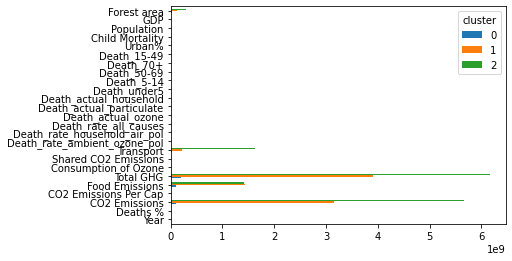

<Figure size 2880x1440 with 0 Axes>

In [39]:
kahuna.groupby('cluster').mean().T.plot(kind='barh')
plt.figure(figsize=(40,20))


In [22]:
lis = [1,2,3,4,4]
lis.reverse()
lis

[4, 4, 3, 2, 1]

In [23]:
rev_columns = list(columns.astype(str))
rev_columns.reverse()

In [24]:
china = kahuna[kahuna['Entity'] == 'China']

Text(0.5, 1.0, 'China: Death % over Time')

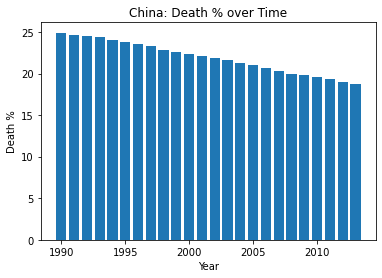

In [25]:
plt.bar(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

Text(0.5, 1.0, 'China: Death % over Time')

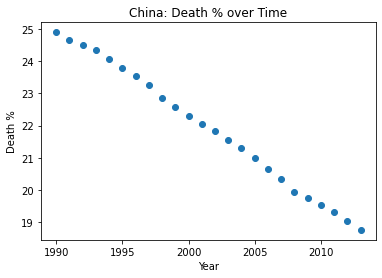

In [37]:
plt.scatter(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

C:\Users\saraz\AppData\Local\Temp/ipykernel_12208/1607540067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['color'] = china['cluster'].map(lambda p: colors[p])


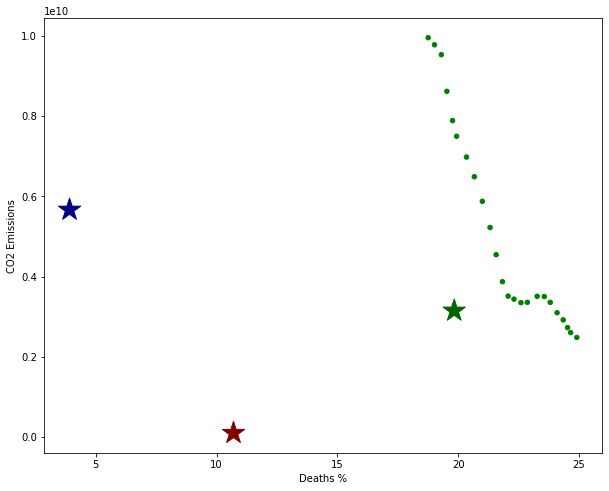

In [38]:
colors = ["red", "green", "blue"]
china['color'] = china['cluster'].map(lambda p: colors[p])

ax = china.plot(    
    kind="scatter", 
    x='Deaths %', y='CO2 Emissions',
    figsize=(10,8),
    c = china['color']
)
centroids.plot(
kind="scatter", 
x='Deaths %', y='CO2 Emissions', 
marker="*", c=["maroon", "darkgreen", "navy"], s=550,
ax=ax);

C:\Users\saraz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


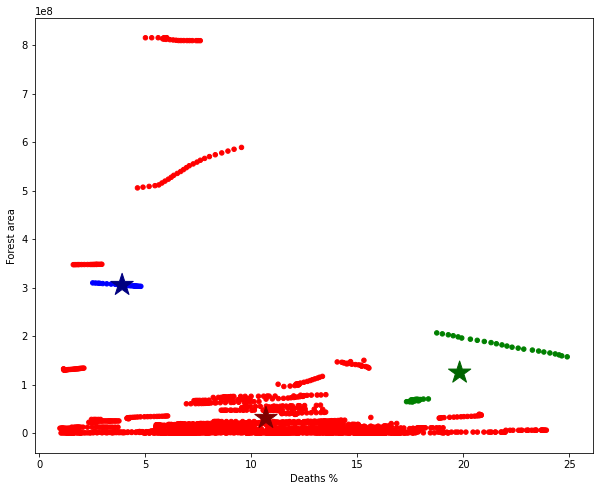

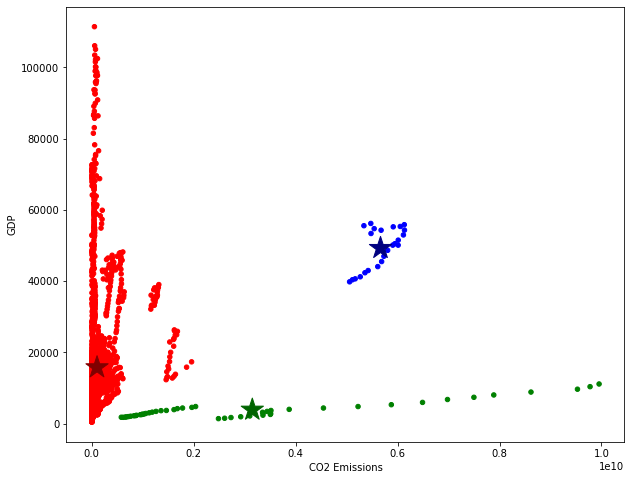

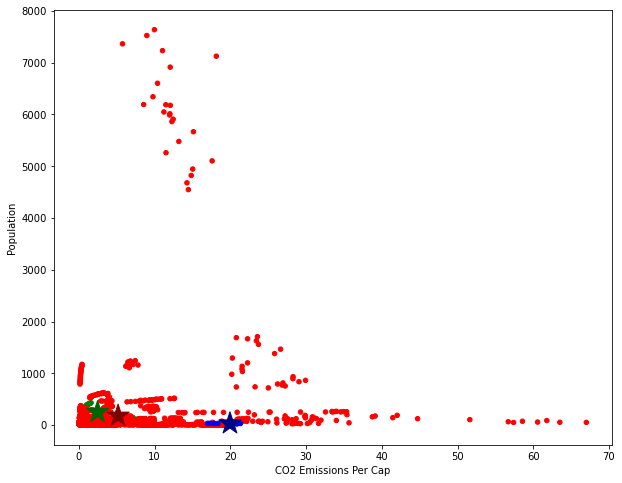

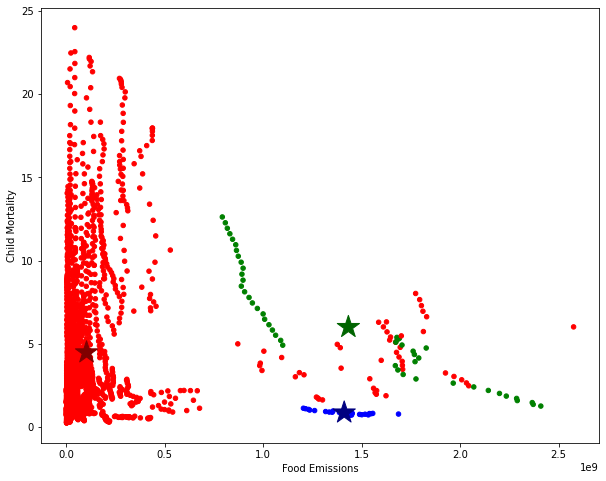

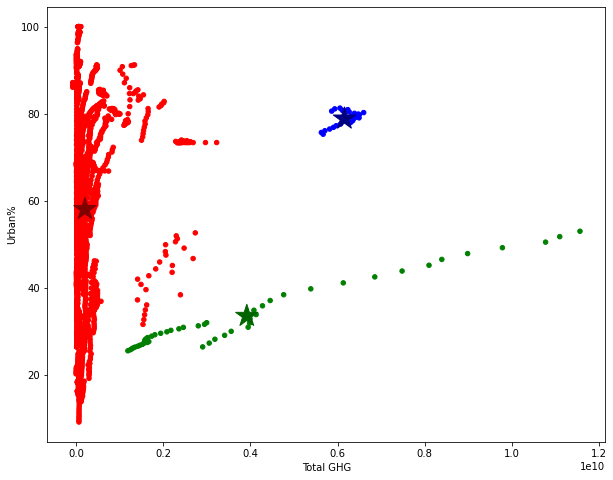

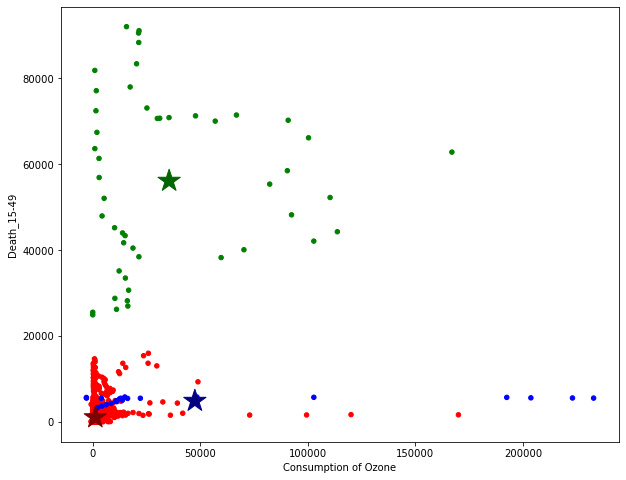

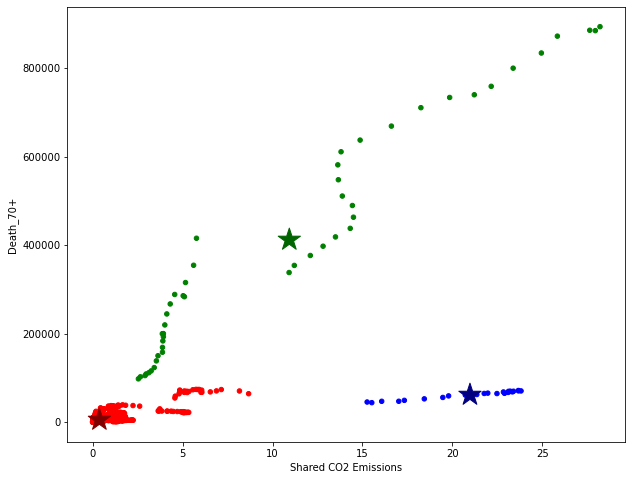

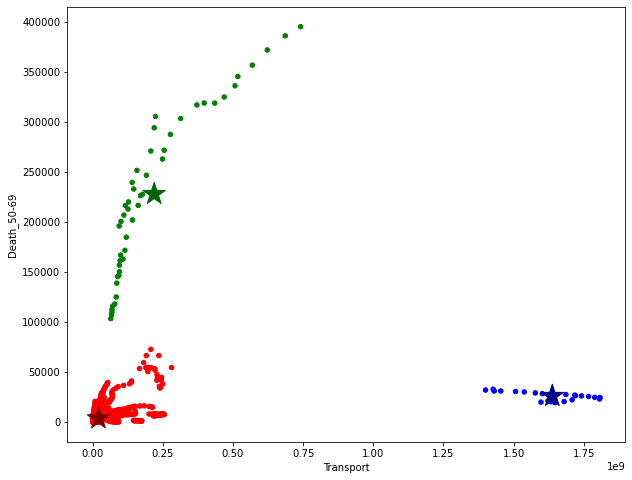

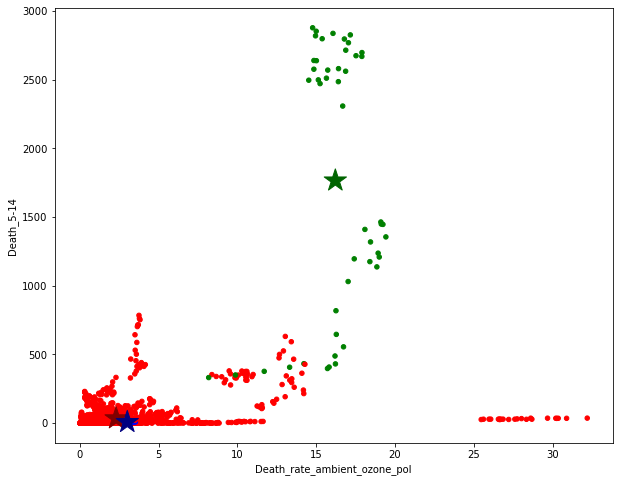

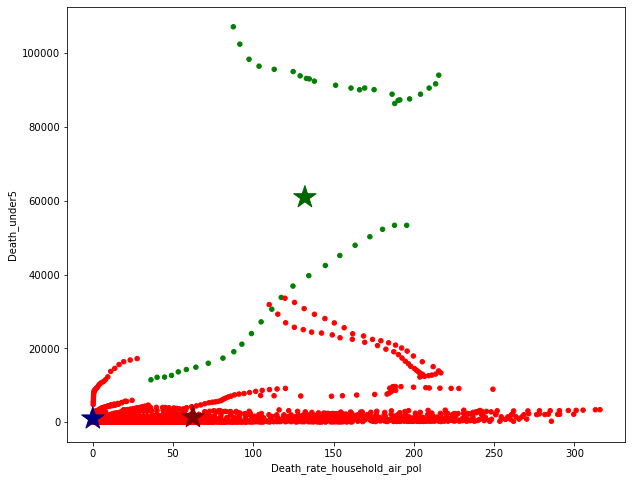

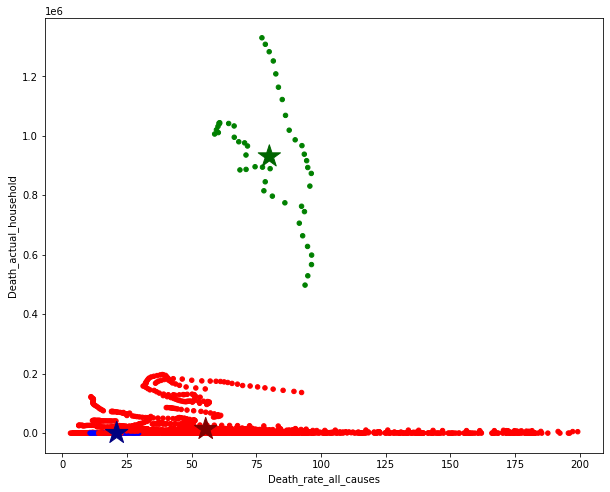

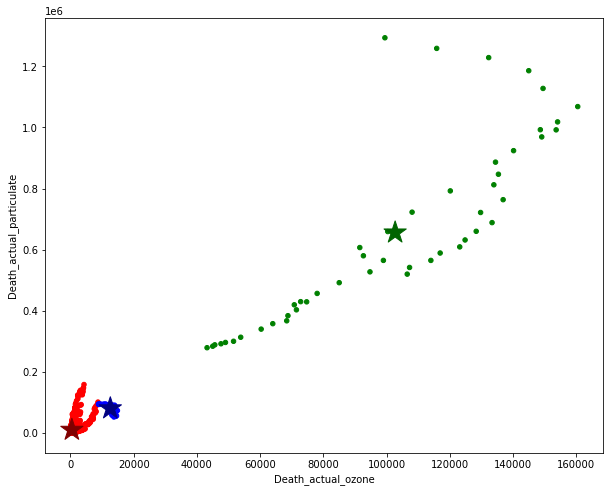

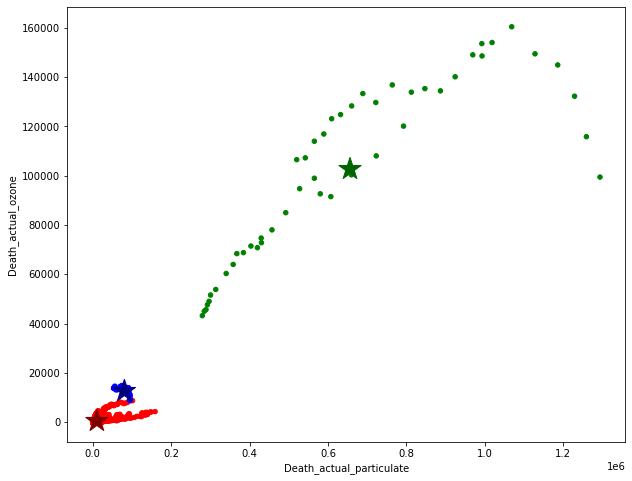

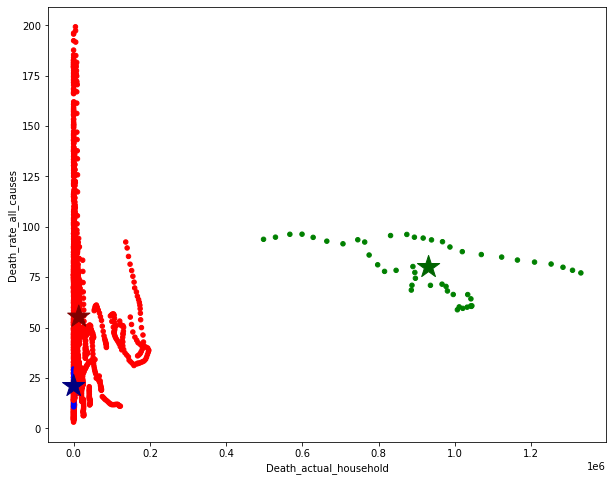

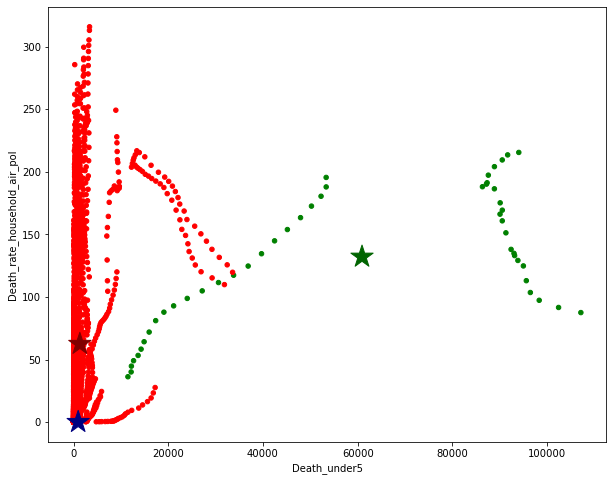

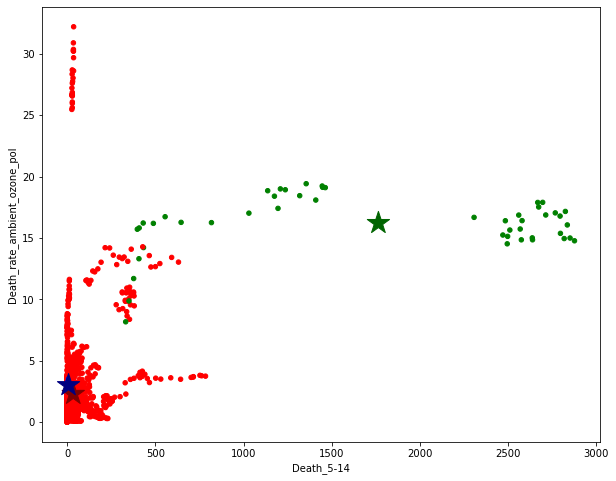

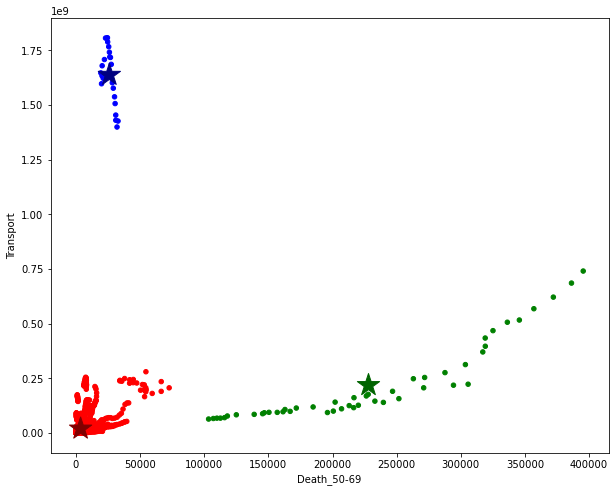

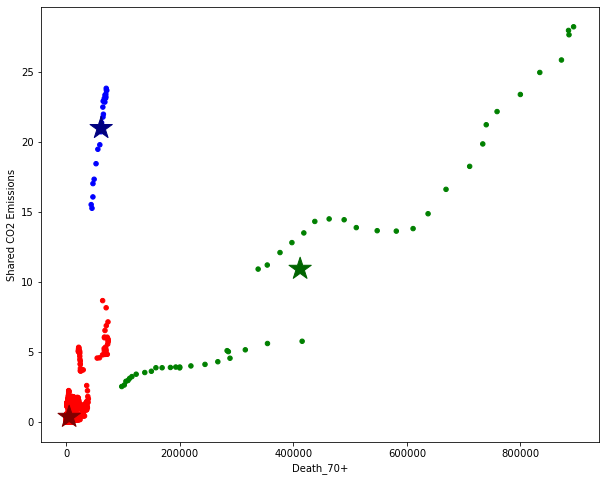

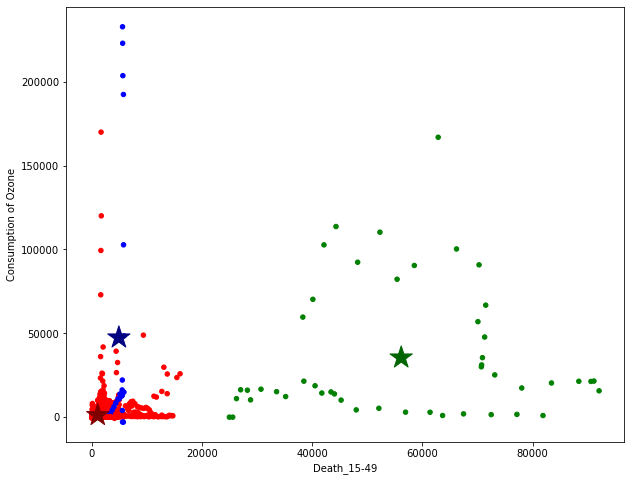

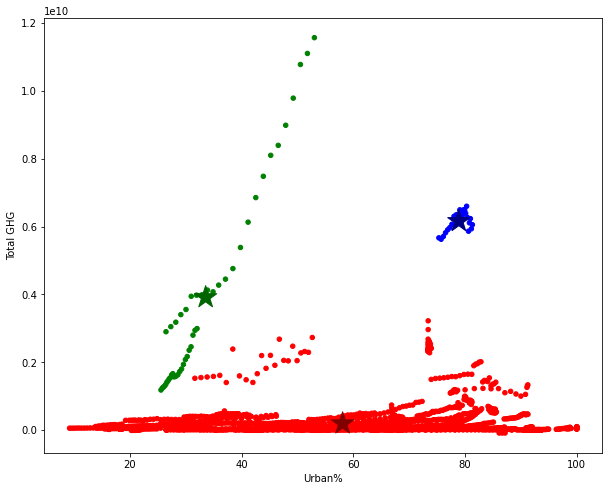

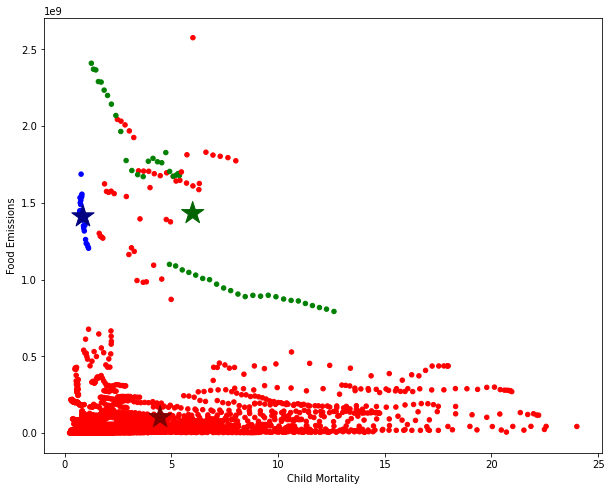

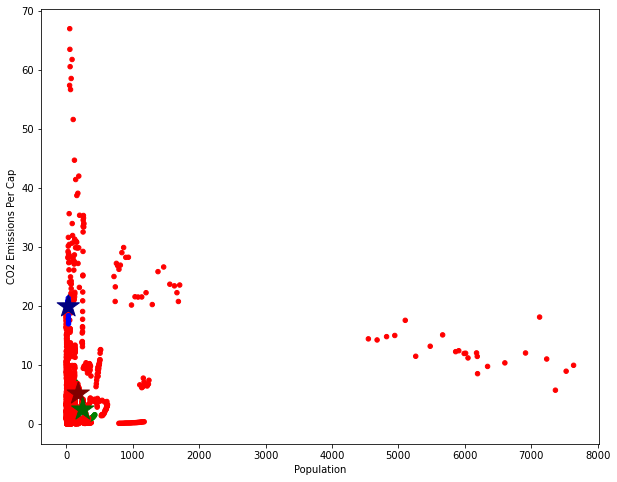

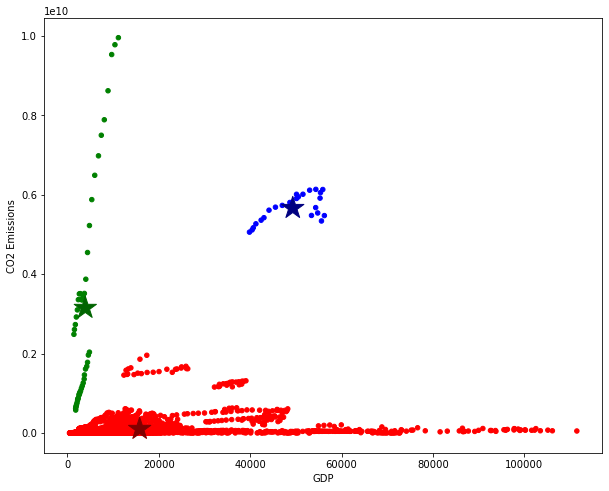

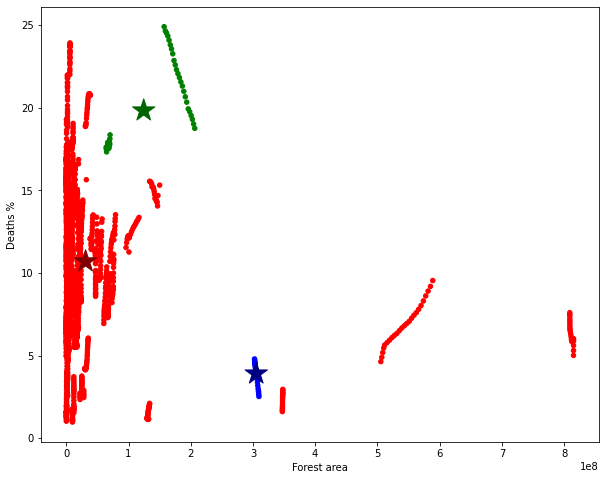

In [39]:
for x, y in zip(columns, rev_columns):
    colors = ["red", "green", "blue"]
    kahuna['color'] = kahuna['cluster'].map(lambda p: colors[p])

    ax = kahuna.plot(    
        kind="scatter", 
        x=x, y=y,
        figsize=(10,8),
        c = kahuna['color']
    )
    centroids.plot(
    kind="scatter", 
    x=x, y=y, 
    marker="*", c=["maroon", "darkgreen", "navy"], s=550,
    ax=ax
    );

In [54]:
from mpl_toolkits import mplot3d

In [ ]:
#gaussian models, spectral models, ward, aglomartive(egglomartive), optics

# Hierarchical Clustering

In [57]:
h_df = X_sc.copy()

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [59]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(h_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(h_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9276168231216942.
Cophenetic correlation for Euclidean distance and complete linkage is 0.9163880187828435.
Cophenetic correlation for Euclidean distance and average linkage is 0.9491166475042377.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9234027224591498.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9030828822824957.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8606130763865654.
Cophenetic correlation for Chebyshev distance and average linkage is 0.888967174686825.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8435753578297.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8314667247335189.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8243003396358517.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8946693898070961.
Cophenetic correl

In [60]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9491166475042377, which is obtained with Euclidean distance and average linkage.


In [61]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(h_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(h_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9276168231216942.
Cophenetic correlation for complete linkage is 0.9163880187828435.
Cophenetic correlation for average linkage is 0.9491166475042377.
Cophenetic correlation for centroid linkage is 0.9495093656172966.
Cophenetic correlation for ward linkage is 0.6908577248991543.
Cophenetic correlation for weighted linkage is 0.9234027224591498.


In [62]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9495093656172966, which is obtained with centroid linkage.


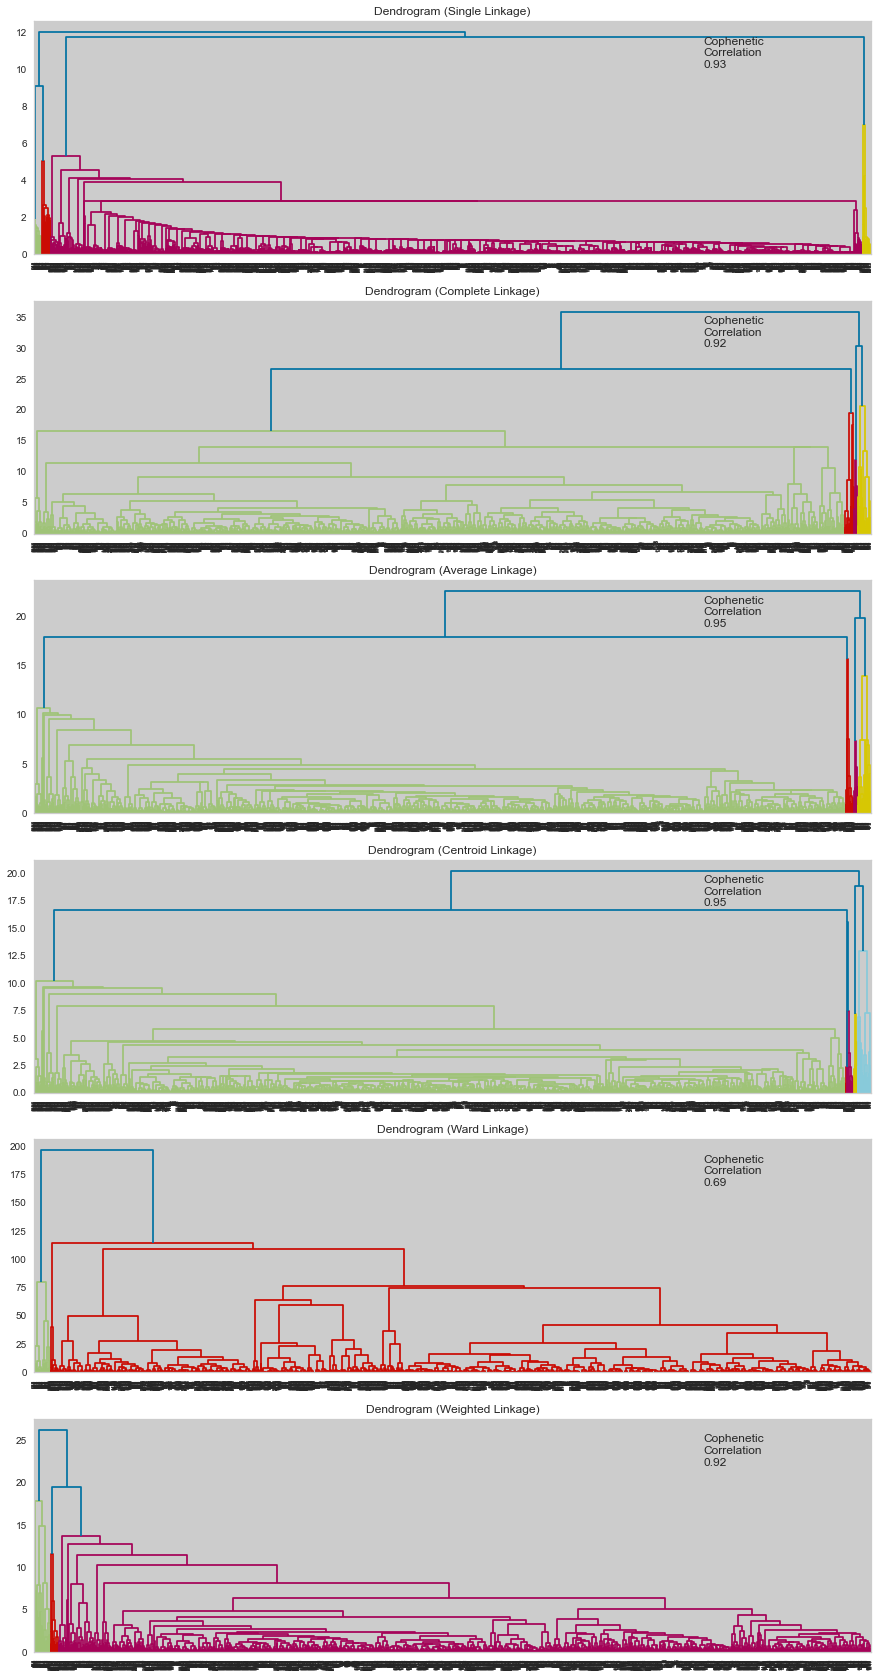

In [63]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))


# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(h_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(h_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [65]:
df_hc = pd.DataFrame(compare, columns = compare_cols)
df_hc = df_hc.sort_values(by = 'Cophenetic Coefficient')

In [67]:
df_hc

,Linkage,Cophenetic Coefficient
4,ward,0.690858
1,complete,0.916388
5,weighted,0.923403
0,single,0.927617
2,average,0.949117
3,centroid,0.949509


In [68]:
from sklearn.cluster import AgglomerativeClustering

In [72]:


H_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
H_model.fit(h_df)

AgglomerativeClustering(linkage='average')

In [86]:
h_df = pd.DataFrame(h_df, columns = X.columns)

In [91]:
h_df['hc_segments'] = H_model.labels_
df1['hc_segments'] = H_model.labels_

In [105]:
h_df['km_labels'] = km.labels_
df1['km_labels'] = km.labels_

In [106]:
df1.sample(10)

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,hc_segments,km_labels
81,Argentina,2008,4.148891,188106000,4.6932,365245207.9,482380000.0,654.80,0.59,45100000.0,...,3433.867356,6810.832217,697.886343,90.530,1.53,14.645487,23103.456522,30846800.0,1,0
1654,Pakistan,2005,17.061362,134756587,0.8406,209589324.9,291300000.0,606.80,0.46,27200000.0,...,18287.024411,20025.286315,6333.192460,33.982,9.61,207.949366,3706.824023,4302495.0,1,0
838,Guatemala,2007,12.252533,12144909,0.8865,30070711.0,44360000.0,302.90,0.04,5500000.0,...,498.473617,858.498087,271.615300,47.508,3.93,125.765370,7269.206260,3868580.0,1,0
346,Brunei,1997,2.396551,4931744,15.8088,2901557.5,18640000.0,92.50,0.02,900000.0,...,6.913188,8.222342,3.752336,69.666,1.15,59.195825,69939.977176,401800.0,1,0
607,Democratic Republic of Congo,1998,14.338816,1655511,0.0369,192138622.6,218270000.0,907.40,0.01,500000.0,...,1582.463397,1646.648037,497.292439,34.199,16.71,19.783405,885.785895,145245000.0,1,0
359,Brunei,2010,1.556681,8060800,20.7414,3351578.1,19090000.0,6.90,0.02,1200000.0,...,7.750914,8.849008,3.121207,74.961,0.97,73.744592,67753.421767,380000.0,1,0
1493,New Zealand,2001,1.404438,34490005,8.8256,53189270.7,63550000.0,32.40,0.14,12200000.0,...,95.222530,265.470415,19.587914,86.100,0.72,14.737382,33775.232657,9850208.0,1,0
450,Chile,1997,6.834096,55433244,3.7490,25543191.9,58930000.0,856.80,0.23,15700000.0,...,1198.768100,2404.714431,267.332544,85.172,1.22,19.886470,14828.016376,15645757.0,1,0
356,Brunei,2007,1.768555,8309952,22.1618,3225271.6,20420000.0,10.40,0.03,1100000.0,...,7.630263,9.225571,3.490455,73.892,0.95,71.151233,71051.710789,385100.0,1,0
1709,Paraguay,2011,9.119738,5198721,0.8208,185613737.5,187710000.0,16.82,0.02,4500000.0,...,299.115539,451.913505,79.271737,59.584,2.52,15.942565,10714.690931,19155956.0,1,0


<AxesSubplot:xlabel='km_labels'>

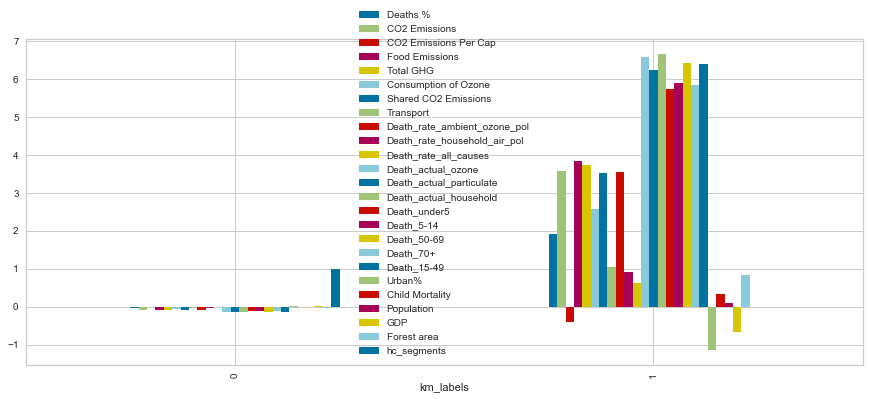

In [107]:
h_df.groupby("km_labels").mean().plot.bar(figsize=(15, 6))

In [108]:
h_df.columns

Index(['Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap', 'Food Emissions',
       'Total GHG', 'Consumption of Ozone', 'Shared CO2 Emissions',
       'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49', 'Urban%', 'Child Mortality', 'Population',
       'GDP', 'Forest area', 'hc_segments', 'km_labels'],
      dtype='object')

C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\asifu\anaconda3\lib

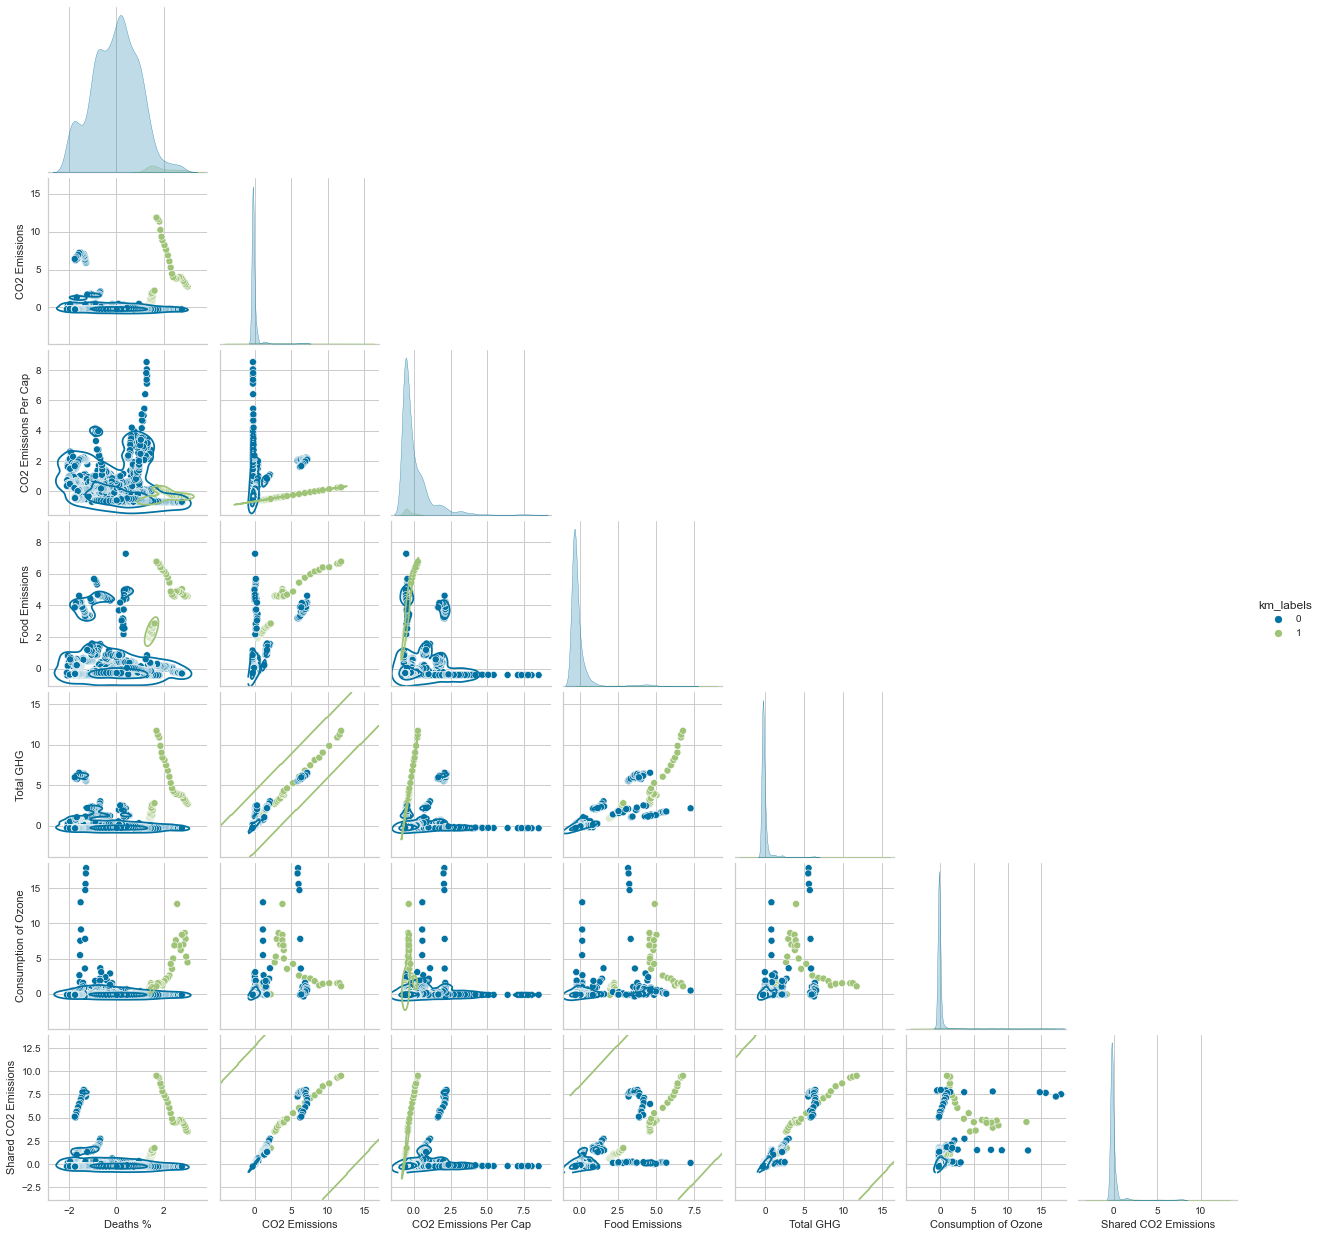

In [109]:
g = sns.pairplot(
    h_df[
        [
            'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap', 'Food Emissions',
       'Total GHG', 'Consumption of Ozone', 'Shared CO2 Emissions','km_labels'
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="km_labels",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

-------------------------

## All Countries

In [42]:
countries_dfs = [pd.DataFrame(kahuna[kahuna['Entity'] == x]) for x in list(kahuna['Entity'].unique())]

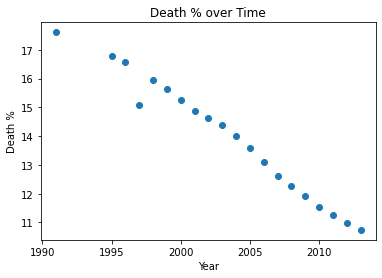

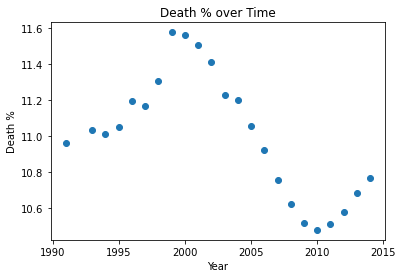

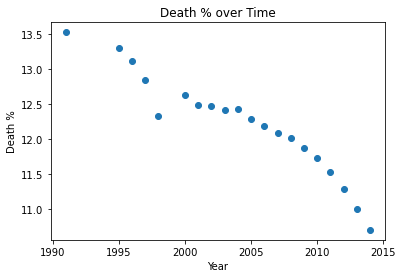

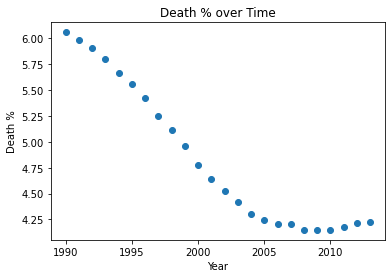

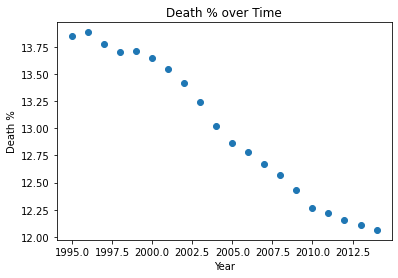

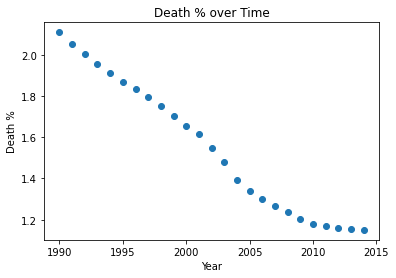

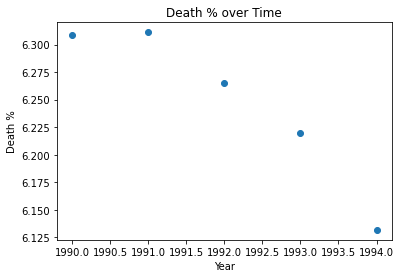

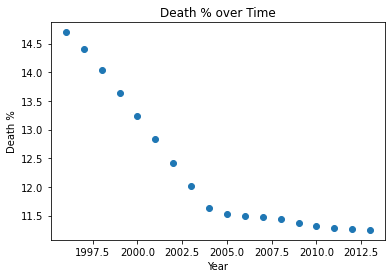

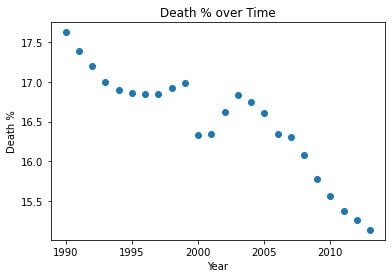

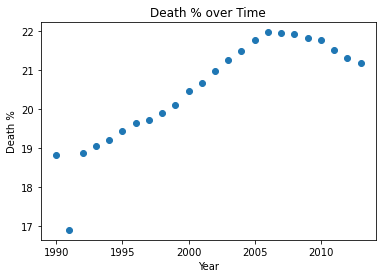

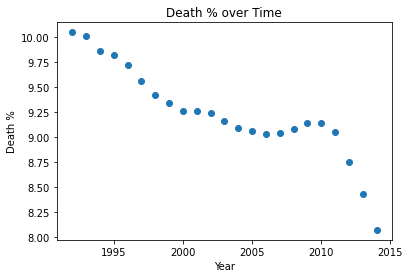

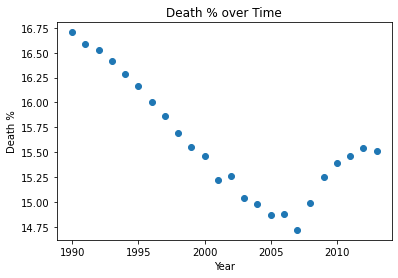

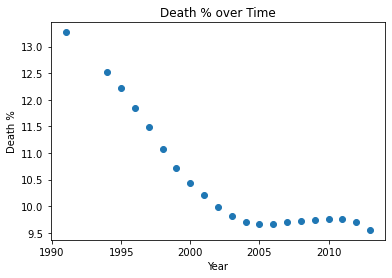

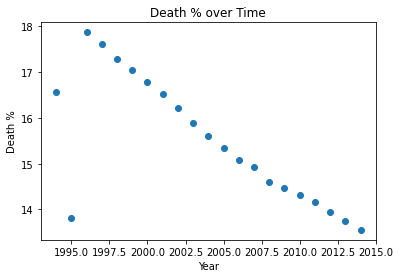

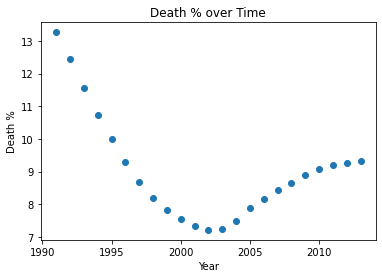

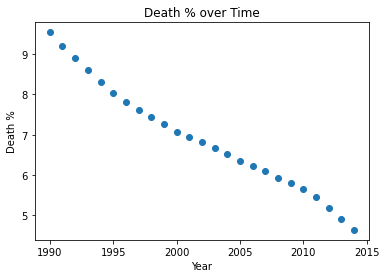

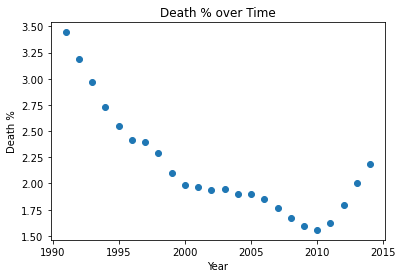

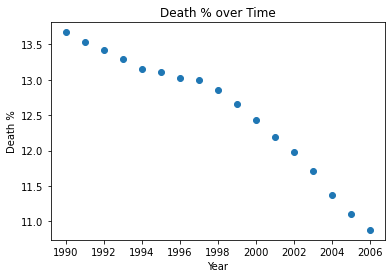

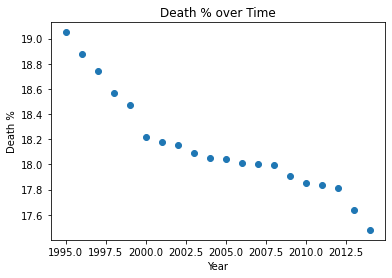

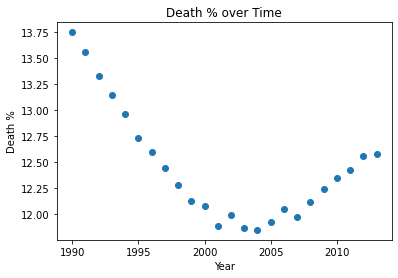

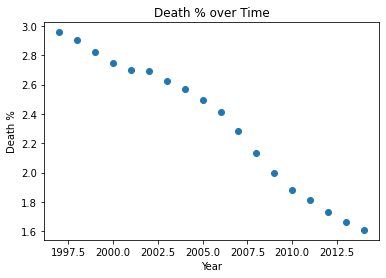

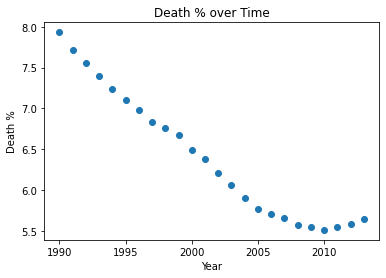

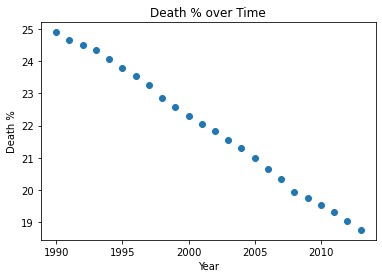

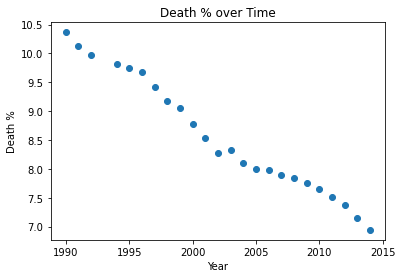

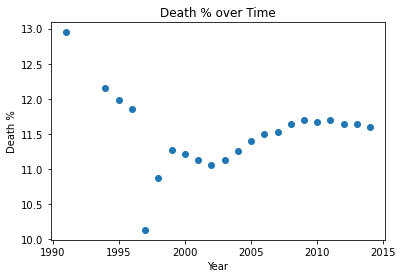

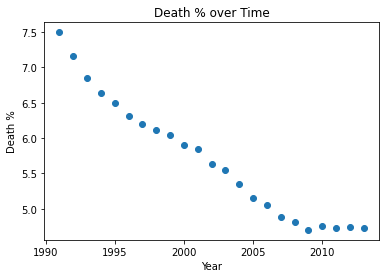

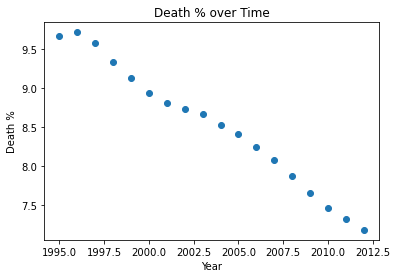

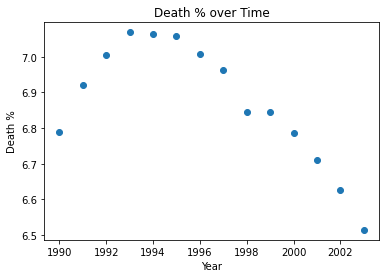

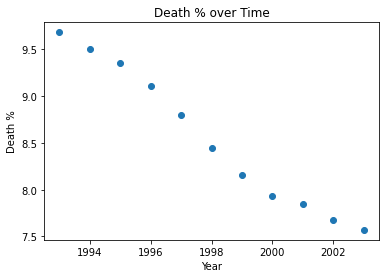

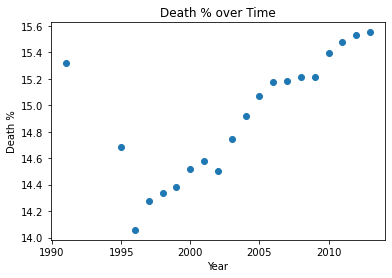

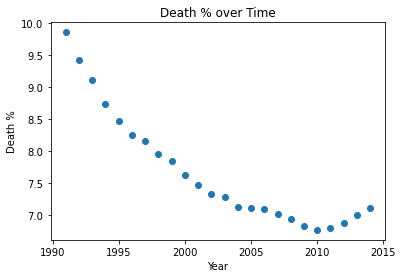

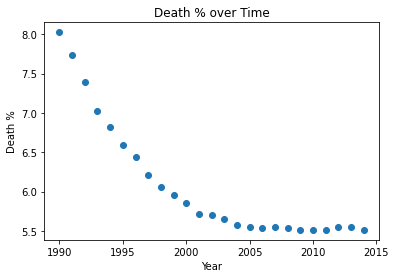

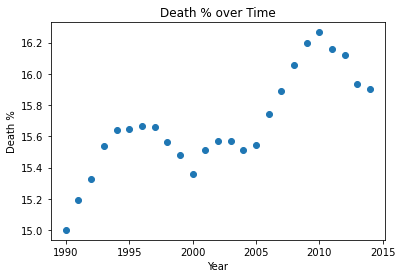

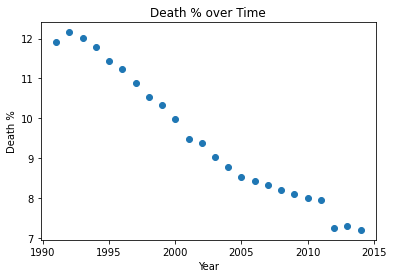

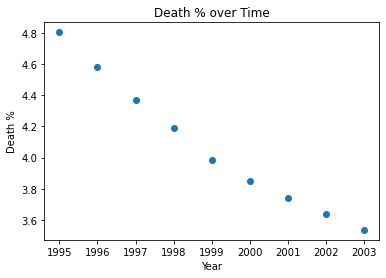

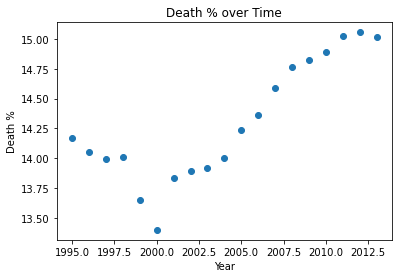

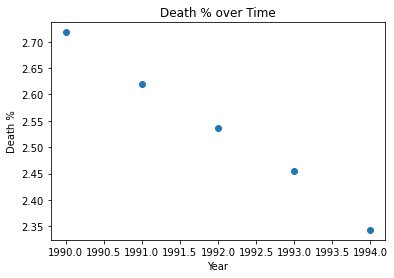

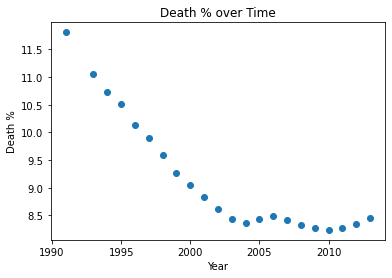

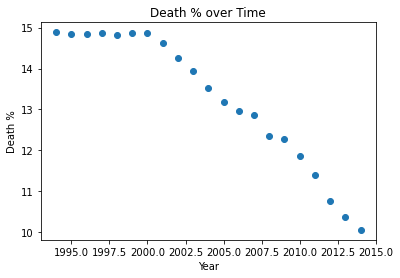

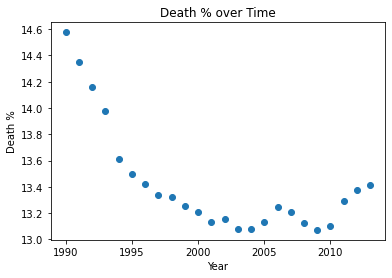

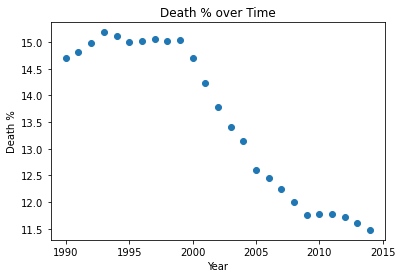

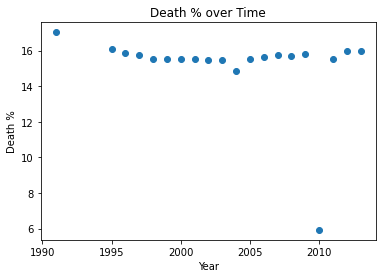

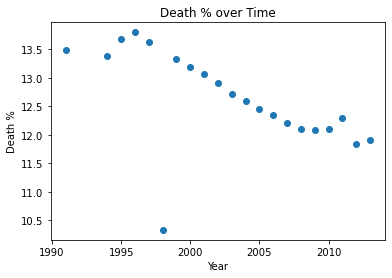

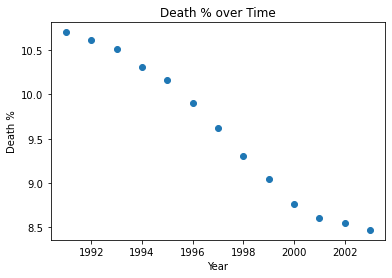

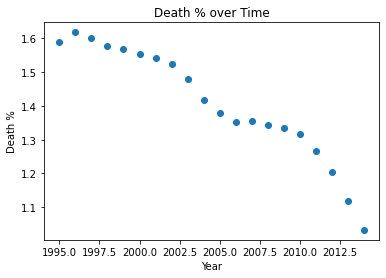

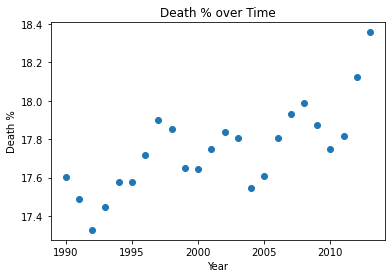

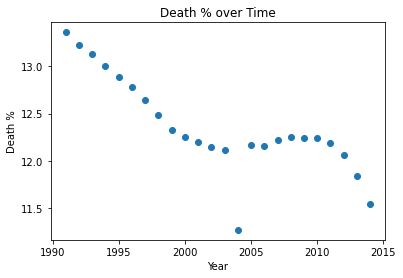

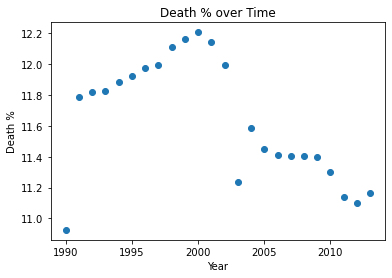

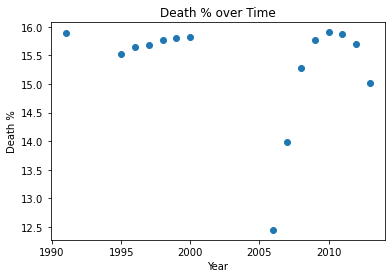

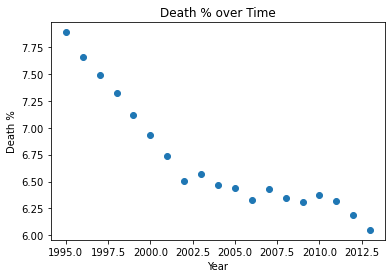

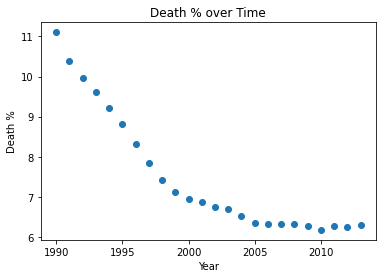

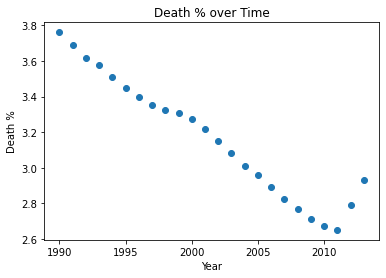

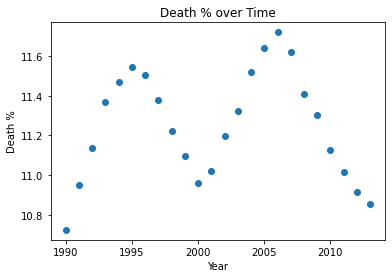

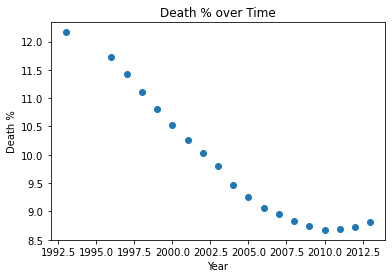

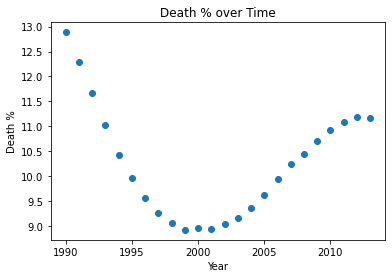

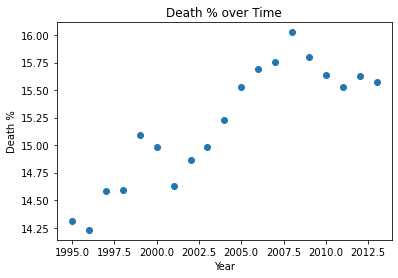

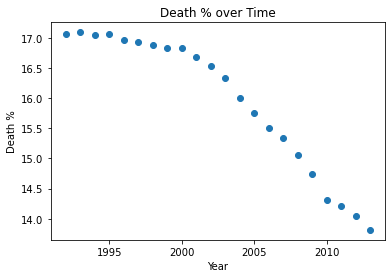

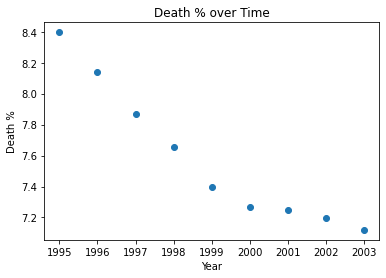

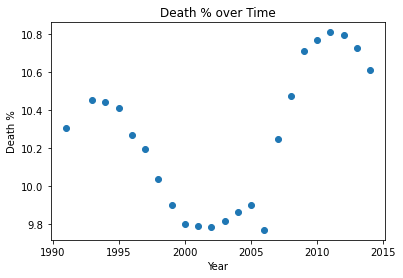

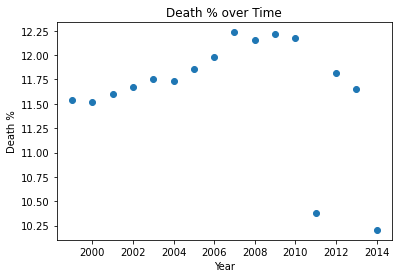

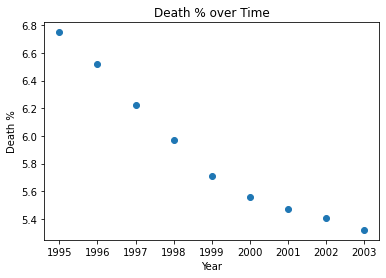

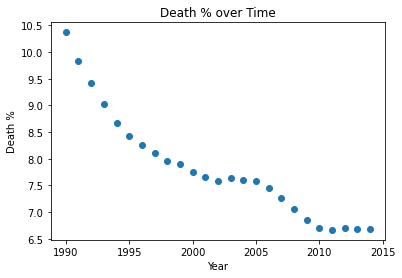

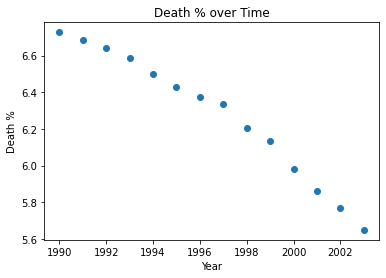

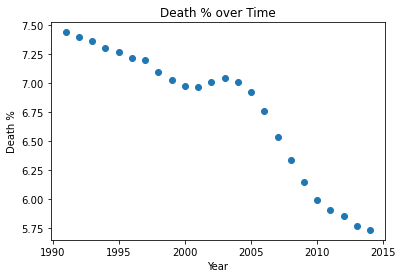

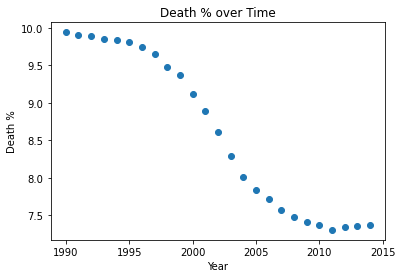

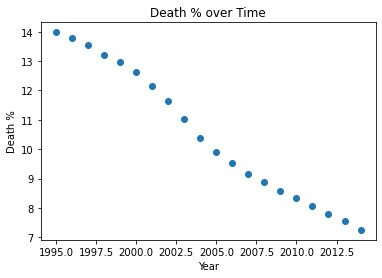

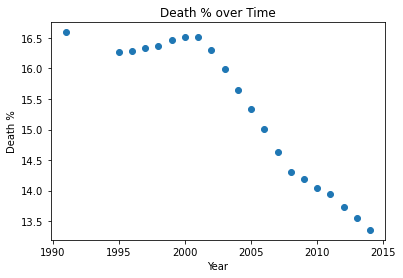

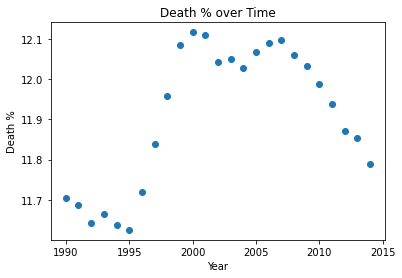

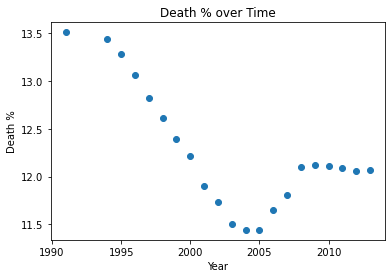

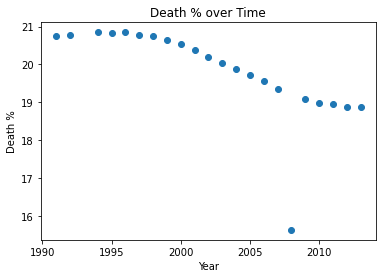

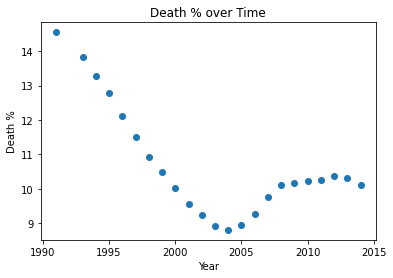

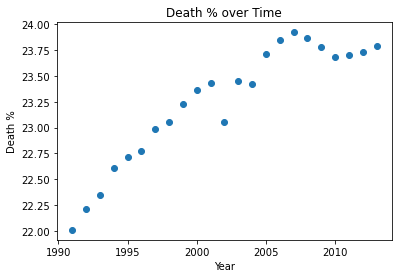

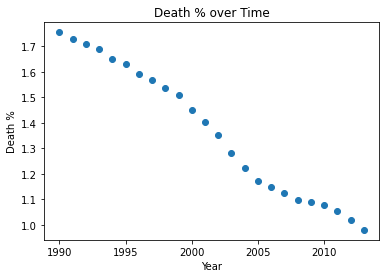

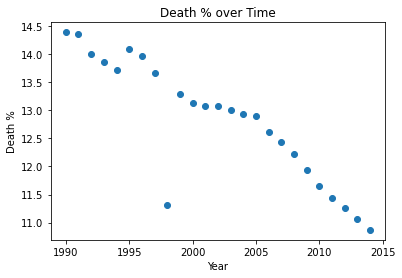

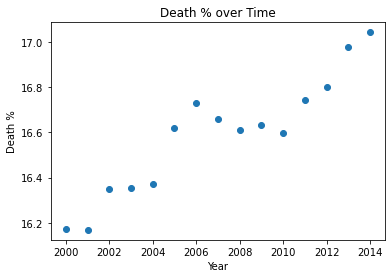

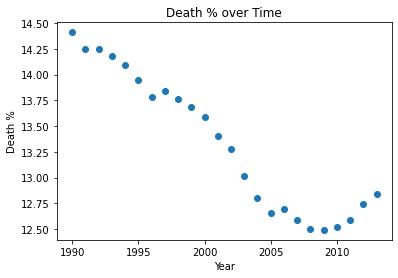

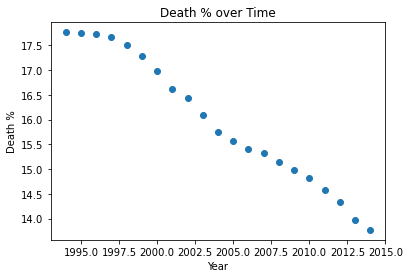

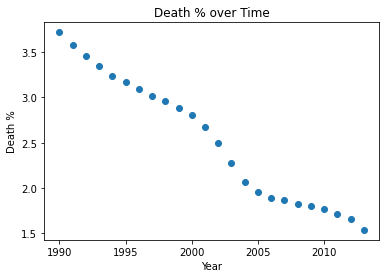

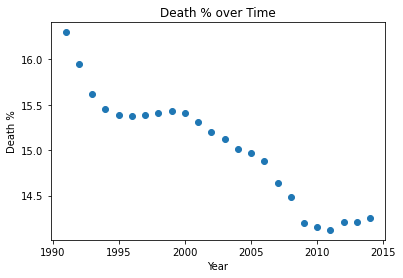

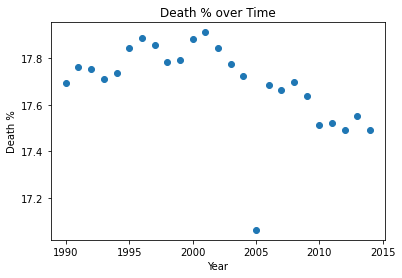

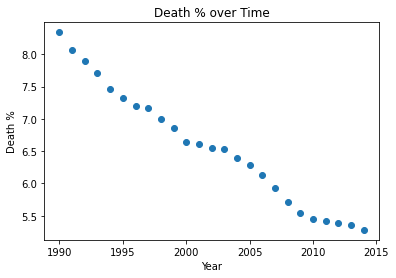

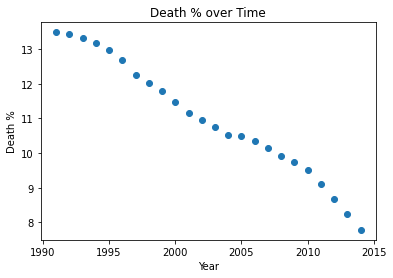

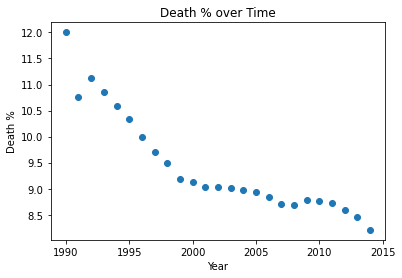

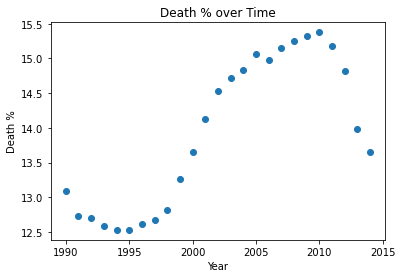

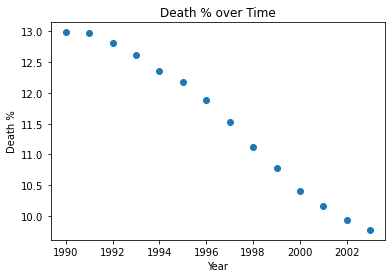

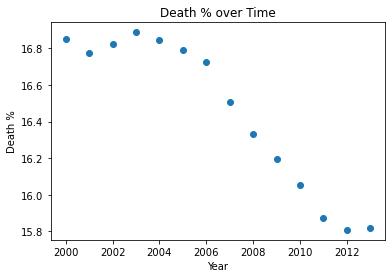

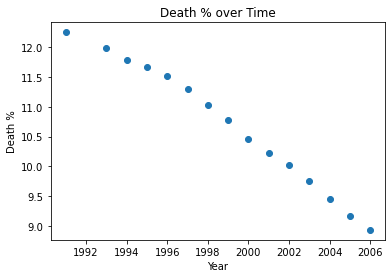

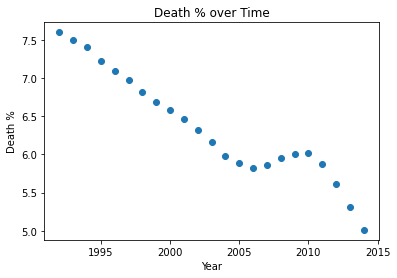

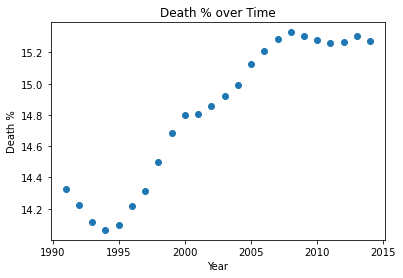

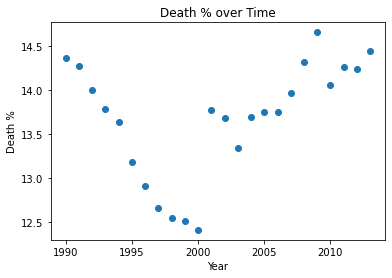

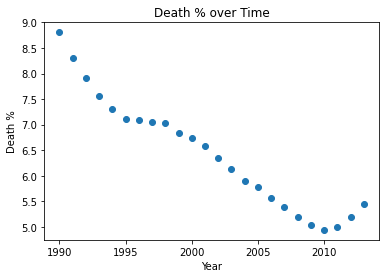

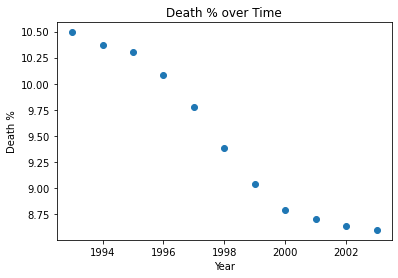

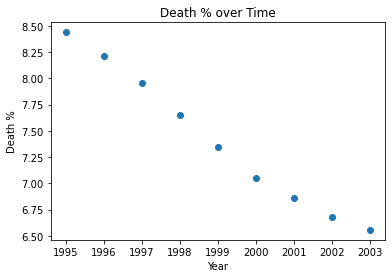

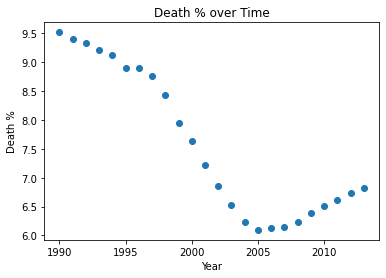

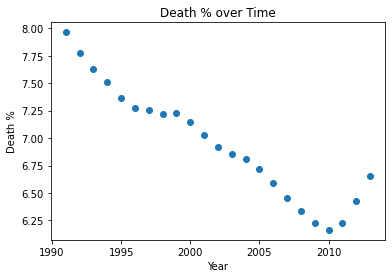

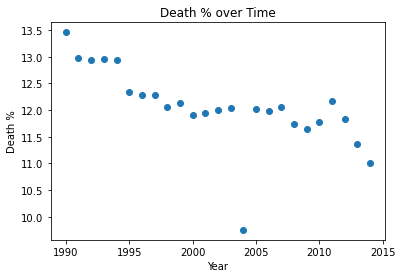

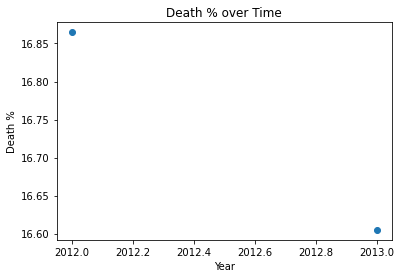

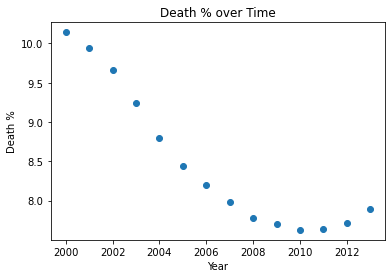

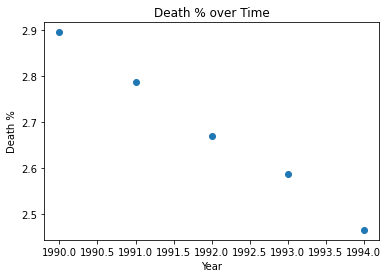

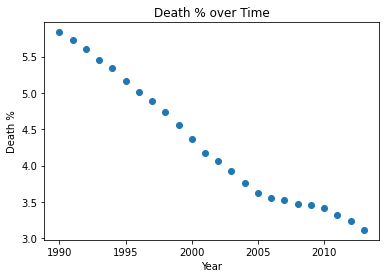

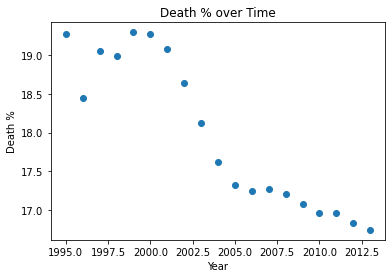

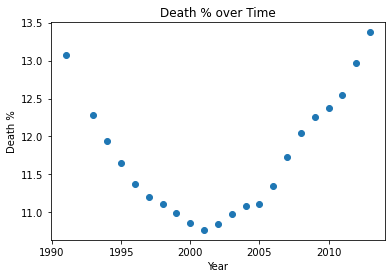

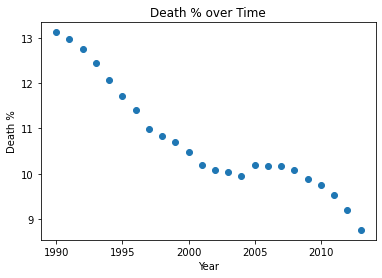

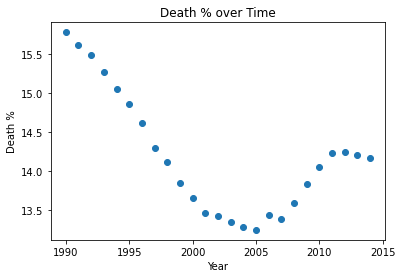

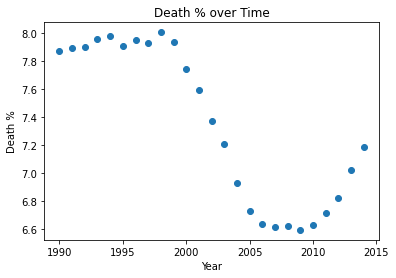

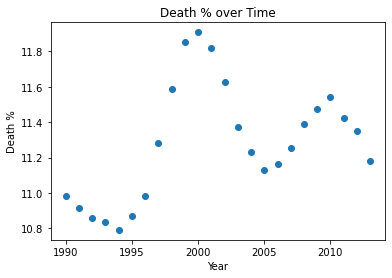

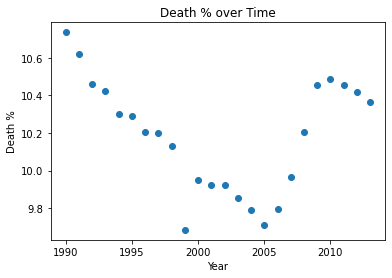

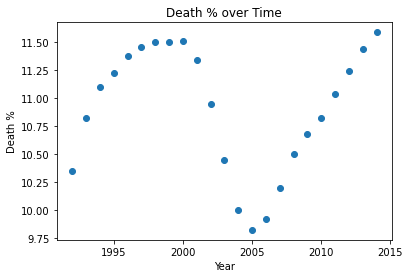

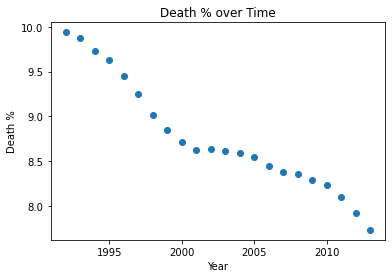

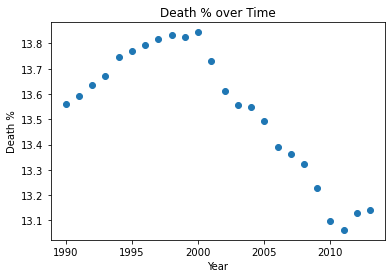

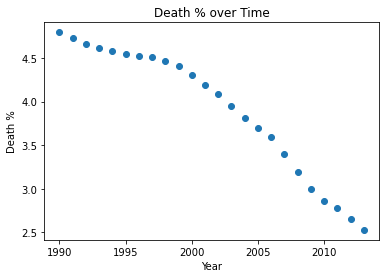

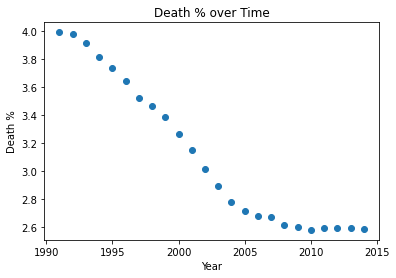

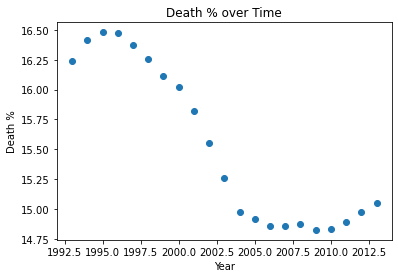

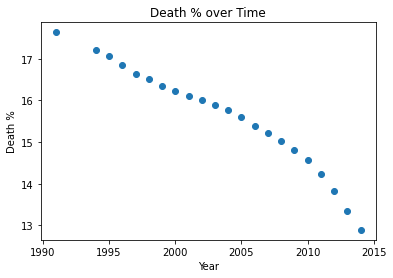

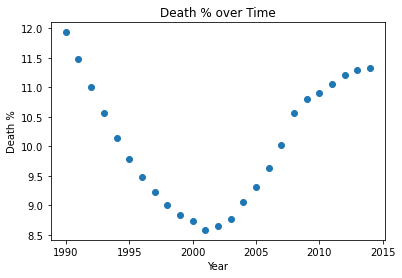

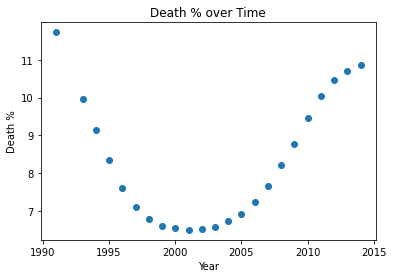

In [43]:
for x in countries_dfs:
    #country = str(x['Entity'][1])
    plt.scatter(x['Year'], x['Deaths %'])
    plt.xlabel('Year')
    plt.ylabel('Death %')
    plt.title('Death % over Time')
    plt.show();

In [44]:
kahuna.columns

Index(['Entity', 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport', 'Death_rate_ambient_ozone_pol',
       'Death_rate_household_air_pol', 'Death_rate_all_causes',
       'Death_actual_ozone', 'Death_actual_particulate',
       'Death_actual_household', 'Death_under5', 'Death_5-14', 'Death_50-69',
       'Death_70+', 'Death_15-49', 'Urban%', 'Child Mortality', 'Population',
       'GDP', 'Forest area', 'cluster', 'color'],
      dtype='object')

AttributeError: 'Axes3DSubplot' object has no attribute 'show'

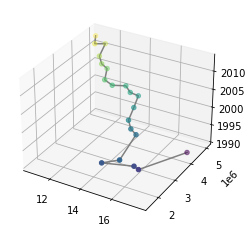

In [45]:
for x in countries_dfs:
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    zline = x['Year']
    xline = x['Deaths %']
    yline = x['CO2 Emissions']
    ax.plot3D(xline, yline, zline, 'gray')

    # Data for three-dimensional scattered points
    zdata = x['Year']
    xdata = x['Deaths %']
    ydata = x['CO2 Emissions']

    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
    
    ax.show();

In [ ]:
china.columns

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(china['Transport'], china['CO2 Emissions'], asdf, color='black')
ax.set_title('wireframe');

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = kahuna['Deaths %']
xline = kahuna['Year']
yline = kahuna['CO2 Emissions']
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = kahuna['Deaths %']
xdata = kahuna['Year']
ydata = kahuna['CO2 Emissions']

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
albania = kahuna[kahuna['Entity'] == 'Albania']

In [ ]:
ax = px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year')
fig = px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year')
fig.show();

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=1, cols=2)

# adding surfaces to subplots.
fig.add_trace(
    px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=1)

fig.add_trace(
    px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=2)

fig.show()

In [ ]:
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(cols=2)

fig.add_trace(
    px.scatter_3d(china, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=1
)

fig.add_trace(
    px.scatter_3d(albania, x='Deaths %', y='CO2 Emissions', z='Year'),
    row=1, col=2
)

In [ ]:
trace1 = go.Bar(
    x=china['Year'],
    y=china['Deaths %']
)
trace2 = go.Bar(
    x=albania['Year'],
    y=albania['Deaths %']
)

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(xaxis=dict(tickangle=90))
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(px.scatter_3d(china, x='Deaths %', y='Year', z='CO2 Emissions'), row=1, col=1) 
fig.add_trace(px.scatter_3d(albania, x='Deaths %', y='Year', z='CO2 Emissions'), row=1, col=2) 
fig.show()